<a href="https://colab.research.google.com/github/nangchung0536/Cs114.k21/blob/master/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Check the versions of libraries
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]
scipy: 1.4.1
numpy: 1.18.5
matplotlib: 3.2.1
pandas: 1.0.4
sklearn: 0.22.2.post1


In [0]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [0]:

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)

In [4]:
# shape
print(dataset.shape)

(150, 5)


In [5]:

# head
print(dataset.head(20))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [6]:
# descriptions
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [7]:

print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [8]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


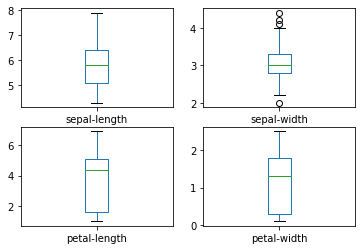

In [9]:

# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

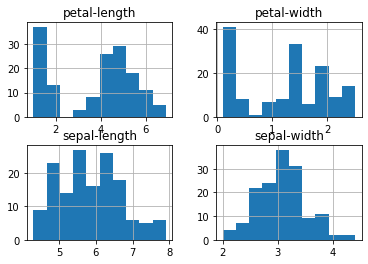

In [10]:

# histograms
dataset.hist()
pyplot.show()

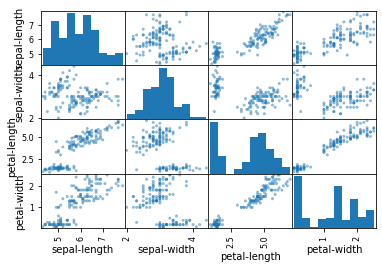

In [11]:

# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

In [0]:
array=dataset.values
X=array[:,0:4]
y=array[:,4]
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2,random_state=1)

In [14]:
models=[]
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.950000 (0.055277)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


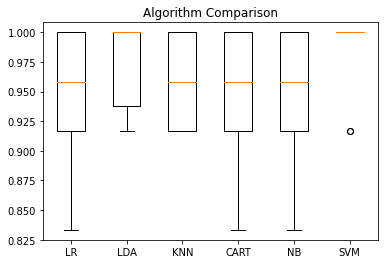

In [15]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [0]:
model = SVC(gamma='auto')
model.fit(X_train, y_train)
predictions = model.predict(X_valid)

In [17]:

print(accuracy_score(y_valid, predictions))
print(confusion_matrix(y_valid, predictions))
print(classification_report(y_valid, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



Thử với files lấy trên kaggle

In [18]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chungtangnang","key":"ebc3843b957a91073dea2ee92a5a6dc4"}'}

In [19]:
!pip install kaggle

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [21]:

!kaggle datasets list -s Malnutrition

ref                                                      title                                        size  lastUpdated          downloadCount  
-------------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  
ruchi798/malnutrition-across-the-globe                   Malnutrition across the globe                79KB  2020-05-25 09:51:45             14  
mohitkr05/malnutrition-data-unicef                       Malnutrition Data Unicef                    396KB  2020-06-03 10:55:28              0  
theworldbank/health-nutrition-and-population-statistics  Health Nutrition and Population Statistics   14MB  2016-11-18 05:46:51          10854  
ophi/mpi                                                 Multidimensional Poverty Measures            19KB  2018-02-16 18:24:39           3905  
mitchellreynolds/multidimensional-poverty-measures       Multidimensional Poverty Measures            49KB  2018-03-28 18:24:10   

In [22]:

!kaggle datasets download -d ruchi798/malnutrition-across-the-globe

  0% 0.00/78.6k [00:00<?, ?B/s]
100% 78.6k/78.6k [00:00<00:00, 32.2MB/s]


In [23]:
!unzip /content/malnutrition-across-the-globe.zip

Archive:  /content/malnutrition-across-the-globe.zip
  inflating: country-wise-average.csv  
  inflating: malnutrition-estimates.csv  


In [0]:
df=read_csv('country-wise-average.csv')

In [25]:
df.head()

,Country,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
0,AFGHANISTAN,0.0,3.033333,10.350000,5.125000,47.775000,30.375000,4918.561500
1,ALBANIA,2.0,4.075000,7.760000,20.800000,24.160000,7.700000,232.859800
2,ALGERIA,2.0,2.733333,5.942857,12.833333,19.571429,7.342857,3565.213143
3,ANGOLA,1.0,2.400000,6.933333,2.550000,42.633333,23.600000,3980.054000
4,ARGENTINA,2.0,0.200000,2.150000,11.125000,10.025000,2.600000,3613.651750


In [26]:
df.shape

(152, 8)

In [27]:
df.describe()

,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
count,152.000000,140.000000,150.000000,149.000000,151.000000,150.000000,152.000000
mean,1.427632,2.168650,6.599257,7.201638,25.814728,13.503047,4042.927052
std,0.967019,1.708939,4.481723,4.649144,14.686807,10.895839,13164.191927
min,0.000000,0.000000,0.000000,0.962500,1.000000,0.100000,1.000000
25%,1.000000,0.900000,3.262500,3.850000,13.485000,4.305000,241.765813
50%,1.000000,1.872500,5.710714,6.300000,24.160000,10.380000,981.233486
75%,2.000000,2.822727,8.740476,9.080000,36.564935,19.496875,3002.433080
max,3.000000,11.400000,23.650000,26.500000,57.600000,46.266667,123014.491000


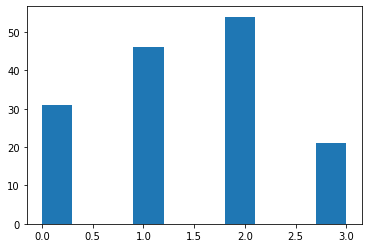

In [28]:
pyplot.hist(df['Income Classification'])
pyplot.show()

<Figure size 1440x2160 with 0 Axes>

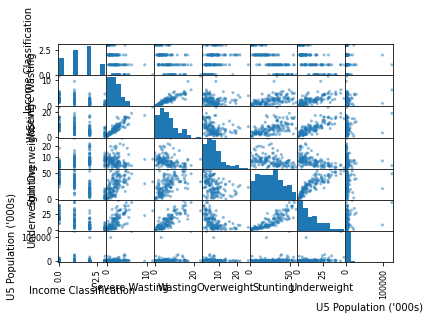

In [29]:
pyplot.figure(figsize=(20,30))
scatter_matrix(df)
pyplot.show()

In [30]:
df=df.drop('Country',axis=1)
df

,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
0,0.0,3.033333,10.350000,5.125000,47.775000,30.375000,4918.561500
1,2.0,4.075000,7.760000,20.800000,24.160000,7.700000,232.859800
2,2.0,2.733333,5.942857,12.833333,19.571429,7.342857,3565.213143
3,1.0,2.400000,6.933333,2.550000,42.633333,23.600000,3980.054000
4,2.0,0.200000,2.150000,11.125000,10.025000,2.600000,3613.651750
...,...,...,...,...,...,...,...
147,2.0,NaN,4.333333,5.409524,16.957143,4.242857,2787.800095
148,1.0,2.331250,8.661905,3.317647,34.922727,22.918182,7507.220273
149,0.0,5.300000,15.242857,4.842857,51.900000,37.785714,3269.476000
150,1.0,2.042857,5.542857,7.228571,48.137500,17.885714,2083.494500


In [31]:
new_df = df.dropna(axis = 0, how ='any') 
new_df

,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
0,0.0,3.033333,10.350000,5.125000,47.775000,30.375000,4918.561500
1,2.0,4.075000,7.760000,20.800000,24.160000,7.700000,232.859800
2,2.0,2.733333,5.942857,12.833333,19.571429,7.342857,3565.213143
3,1.0,2.400000,6.933333,2.550000,42.633333,23.600000,3980.054000
4,2.0,0.200000,2.150000,11.125000,10.025000,2.600000,3613.651750
...,...,...,...,...,...,...,...
146,1.0,1.700000,5.800000,4.800000,26.766667,11.266667,31.771333
148,1.0,2.331250,8.661905,3.317647,34.922727,22.918182,7507.220273
149,0.0,5.300000,15.242857,4.842857,51.900000,37.785714,3269.476000
150,1.0,2.042857,5.542857,7.228571,48.137500,17.885714,2083.494500


In [0]:
array=new_df.values
X=array[:,1:]
y=array[:,0]
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2,random_state=1)


In [33]:
models=[]
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
 

LR: 0.527273 (0.110523)
LDA: 0.493182 (0.126968)
KNN: 0.391667 (0.152122)
CART: 0.481061 (0.145929)
NB: 0.474242 (0.103164)
SVM: 0.295455 (0.045455)


In [34]:

model=LogisticRegression(solver='liblinear',multi_class='ovr')
model.fit(X_train,y_train)
pred=model.predict(X_valid)
print(accuracy_score(y_valid,pred))
print(confusion_matrix(y_valid,pred))
print(classification_report(y_valid,pred))


0.39285714285714285
[[1 2 0 0]
 [2 1 6 0]
 [2 2 9 0]
 [0 0 3 0]]
              precision    recall  f1-score   support

         0.0       0.20      0.33      0.25         3
         1.0       0.20      0.11      0.14         9
         2.0       0.50      0.69      0.58        13
         3.0       0.00      0.00      0.00         3

    accuracy                           0.39        28
   macro avg       0.23      0.28      0.24        28
weighted avg       0.32      0.39      0.34        28



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
